<a href="https://colab.research.google.com/github/arihantkode/BrainTumorSegmentation/blob/main/monai_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install 'monai[all]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 97.6

In [2]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 39.4 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!cp '/content/gdrive/MyDrive/Brain_Tumour_Segmentation/MICCAI_BraTS_2018_Data_Training.zip' '/content/'

In [6]:
!unzip /content/MICCAI_BraTS_2018_Data_Training.zip

Archive:  /content/MICCAI_BraTS_2018_Data_Training.zip
   creating: MICCAI_BraTS_2018_Data_Training/
  inflating: __MACOSX/._MICCAI_BraTS_2018_Data_Training  
  inflating: MICCAI_BraTS_2018_Data_Training/.DS_Store  
  inflating: __MACOSX/MICCAI_BraTS_2018_Data_Training/._.DS_Store  
   creating: MICCAI_BraTS_2018_Data_Training/training/
  inflating: __MACOSX/MICCAI_BraTS_2018_Data_Training/._training  
  inflating: MICCAI_BraTS_2018_Data_Training/survival_data.csv  
  inflating: __MACOSX/MICCAI_BraTS_2018_Data_Training/._survival_data.csv  
  inflating: MICCAI_BraTS_2018_Data_Training/training/.DS_Store  
  inflating: __MACOSX/MICCAI_BraTS_2018_Data_Training/training/._.DS_Store  
   creating: MICCAI_BraTS_2018_Data_Training/training/HGG/
  inflating: __MACOSX/MICCAI_BraTS_2018_Data_Training/training/._HGG  
   creating: MICCAI_BraTS_2018_Data_Training/training/LGG/
  inflating: __MACOSX/MICCAI_BraTS_2018_Data_Training/training/._LGG  
   creating: MICCAI_BraTS_2018_Data_Training/train

In [8]:
!cp '/content/gdrive/MyDrive/Brain_Tumour_Segmentation/monai_inference/datalist.json' '/content/datalist.json'
!cp '/content/gdrive/MyDrive/Brain_Tumour_Segmentation/monai_inference/inference.json' '/content/inference.json'
!cp '/content/gdrive/MyDrive/Brain_Tumour_Segmentation/monai_inference/models_model.pt' '/content/models_model.pt'
!cp  '/content/gdrive/MyDrive/Brain_Tumour_Segmentation/monai_inference/prepare_datalist.py' '/content/prepare_datalist.py'

In [15]:
!python /content/prepare_datalist.py --path "/content/MICCAI_BraTS_2018_Data_Training" --output "/content/datalist.json"


2025-09-10 10:39:58.247059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757500798.282891   11473 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757500798.293557   11473 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757500798.323394   11473 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757500798.323437   11473 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757500798.323445   11473 computation_placer.cc:177] computation placer alr

In [16]:
!python -m monai.bundle run --config_file /content/inference.json


2025-09-10 10:40:40.365030: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757500840.387004   11661 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757500840.393551   11661 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757500840.410726   11661 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757500840.410758   11661 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757500840.410762   11661 computation_placer.cc:177] computation placer alr

In [17]:
!cp -r '/content/eval' '/content/gdrive/MyDrive/Brain_Tumour_Segmentation/monai_inference/eval'

In [18]:
import torch
import json
import random
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image

In [19]:
def calculate_iou(pred_mask: np.ndarray, gt_mask: np.ndarray) -> float:
    """
    Calculate Intersection over Union (IoU) between predicted and ground truth masks.

    Args:
        pred_mask: Predicted segmentation mask (binary)
        gt_mask: Ground truth segmentation mask (binary)

    Returns:
        IoU score as float
    """
    # Ensure masks are binary
    pred_binary = (pred_mask > 0).astype(np.uint8)
    gt_binary = (gt_mask > 0).astype(np.uint8)

    # Calculate intersection and union
    intersection = np.logical_and(pred_binary, gt_binary).sum()
    union = np.logical_or(pred_binary, gt_binary).sum()

    # Avoid division by zero
    if union == 0:
        return 1.0 if intersection == 0 else 0.0

    return intersection / union


def calculate_dice_score(pred_mask: np.ndarray, gt_mask: np.ndarray) -> float:
    """
    Calculate Dice score between predicted and ground truth masks.

    Args:
        pred_mask: Predicted segmentation mask (binary)
        gt_mask: Ground truth segmentation mask (binary)

    Returns:
        Dice score as float
    """
    # Ensure masks are binary
    pred_binary = (pred_mask > 0).astype(np.uint8)
    gt_binary = (gt_mask > 0).astype(np.uint8)

    # Calculate intersection and sum
    intersection = np.logical_and(pred_binary, gt_binary).sum()
    sum_masks = pred_binary.sum() + gt_binary.sum()

    # Avoid division by zero
    if sum_masks == 0:
        return 1.0 if intersection == 0 else 0.0

    return (2 * intersection) / sum_masks


In [20]:
def visualize_mri(img_file_path: str, bg_img_file_path: str, title: str):
  """
   visualize mri images with segmentation masks

   Args:
    img_file_path: path to the mri image
    bg_img_file_path: path to the background image
    title: title of the plot
  """
  mri_img = nib.load(img_file_path)
  bg_img = nib.load(bg_img_file_path)
  plotting.plot_roi(mri_img, bg_img = bg_img, title=title)
  plt.show()


In [21]:
with open('/content/datalist.json', 'r') as f:
    datalist = json.load(f)

img_files = []
pred_masks = []
gnd_truth_masks = []

for item in datalist['testing']:
  gnd_truth_file = item['label']
  img_file = item['image'][0]
  img_filename = img_file.split('/')[-1].split('.')[0].replace('_seg', '')
  #print(img_filename)
  pred_file = f"/content/eval/{img_filename}/{img_filename}_seg.nii.gz"
  #print(pred_file)
  gnd_truth_masks.append(gnd_truth_file)
  pred_masks.append(pred_file)
  img_files.append(img_file)

In [22]:
assert len(pred_masks) == len(gnd_truth_masks)

print(f"predicted mask shape = {nib.load(pred_masks[0]).get_fdata().shape}")
print(f"ground truth mask shape = {nib.load(gnd_truth_masks[0]).get_fdata().shape}")

ious = []
dices = []

for i in range(len(pred_masks)):
  pred_mask = nib.load(pred_masks[i]).get_fdata()
  gnd_truth_mask = nib.load(gnd_truth_masks[i]).get_fdata()
  if pred_mask.shape != gnd_truth_mask.shape:
    print(f"Error: {pred_masks[i]} and {gnd_truth_masks[i]} have different shapes. Shapes = {pred_mask.shape}, {gnd_truth_mask.shape}")
    break
  iou = calculate_iou(pred_mask, gnd_truth_mask)
  dice = calculate_dice_score(pred_mask, gnd_truth_mask)
  ious.append(iou)
  dices.append(dice)

avg_iou = np.average(ious)
avg_dice = np.average(dices)

print(f"number of samples = {len(pred_masks)}")
print(f"Average IOU: {avg_iou}")
print(f"Average Dice: {avg_dice}")


predicted mask shape = (240, 240, 155)
ground truth mask shape = (240, 240, 155)
number of samples = 43
Average IOU: 0.8450023460919432
Average Dice: 0.913883259292763


image = /content/MICCAI_BraTS_2018_Data_Training/training/LGG/Brats18_TCIA10_628_1/Brats18_TCIA10_628_1_t1ce.nii


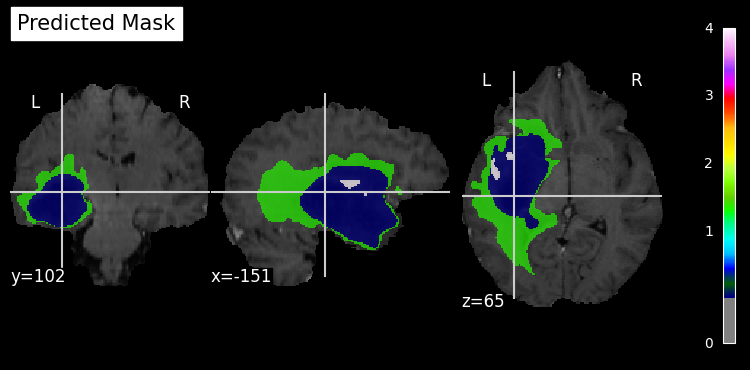

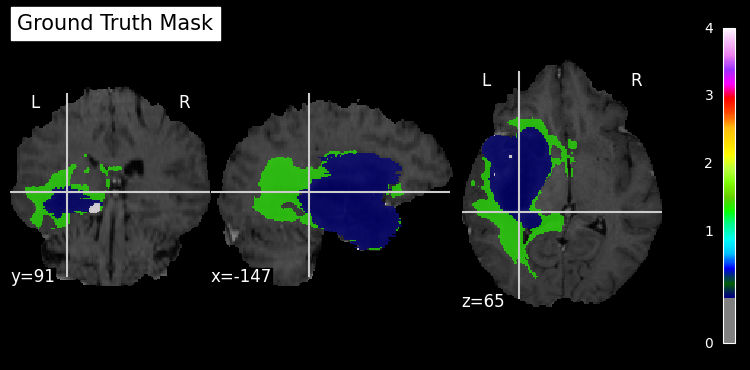

IOU: 0.8146773695585057
Dice: 0.8978757141350246
*************
*************
image = /content/MICCAI_BraTS_2018_Data_Training/training/HGG/Brats18_CBICA_ATV_1/Brats18_CBICA_ATV_1_t1ce.nii


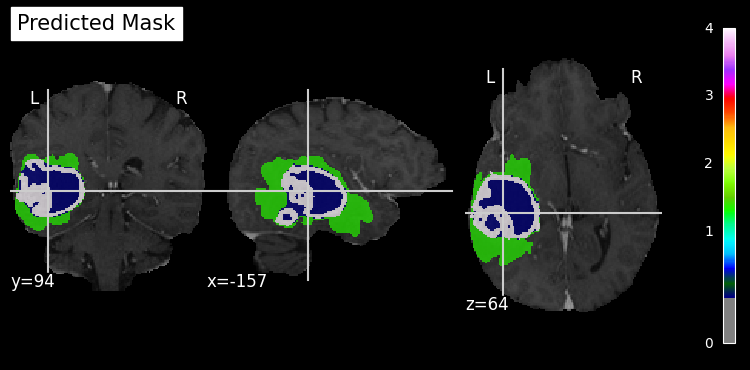

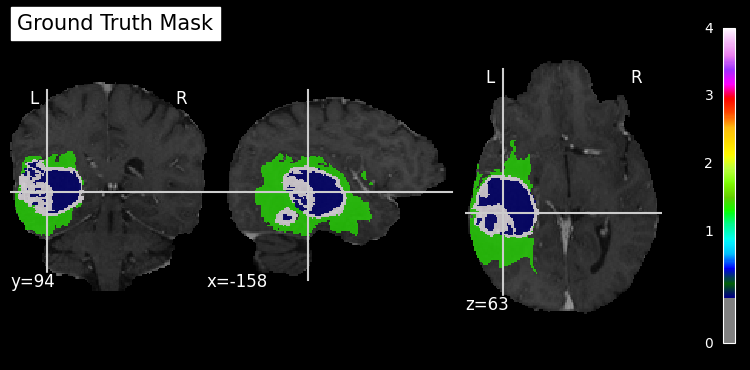

IOU: 0.8532037251620103
Dice: 0.9207878373840649
*************
*************
image = /content/MICCAI_BraTS_2018_Data_Training/training/HGG/Brats18_TCIA01_201_1/Brats18_TCIA01_201_1_t1ce.nii


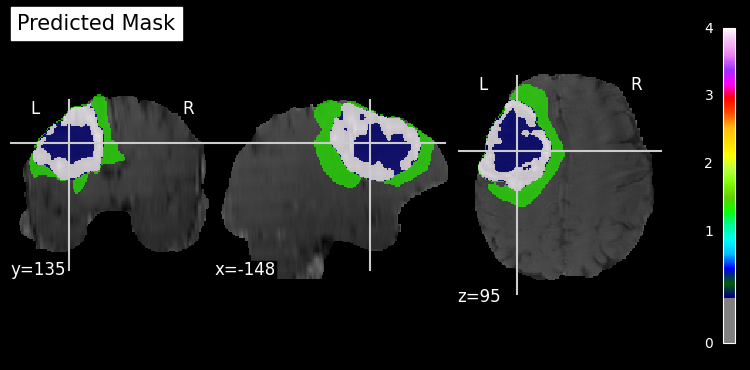

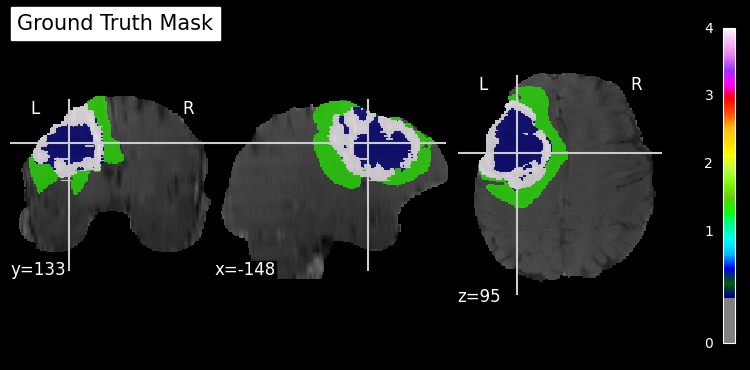

IOU: 0.9316814603393658
Dice: 0.9646326058082932
*************
*************
image = /content/MICCAI_BraTS_2018_Data_Training/training/HGG/Brats18_TCIA02_370_1/Brats18_TCIA02_370_1_t1ce.nii


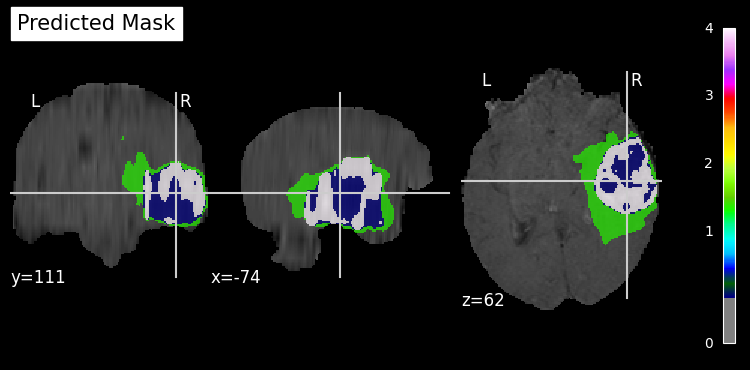

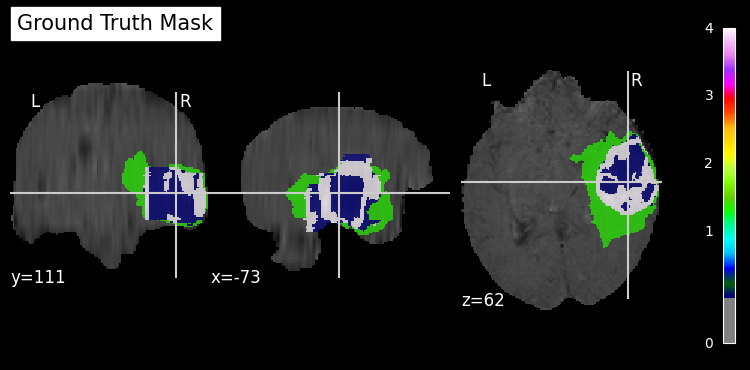

IOU: 0.9234480569537025
Dice: 0.9602006704732448
*************
*************
image = /content/MICCAI_BraTS_2018_Data_Training/training/HGG/Brats18_2013_17_1/Brats18_2013_17_1_t1ce.nii


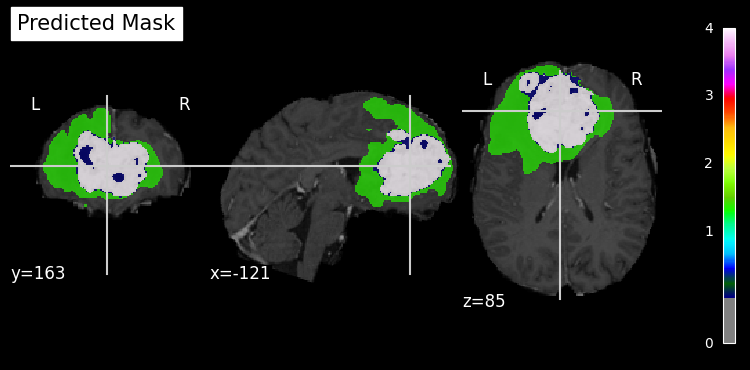

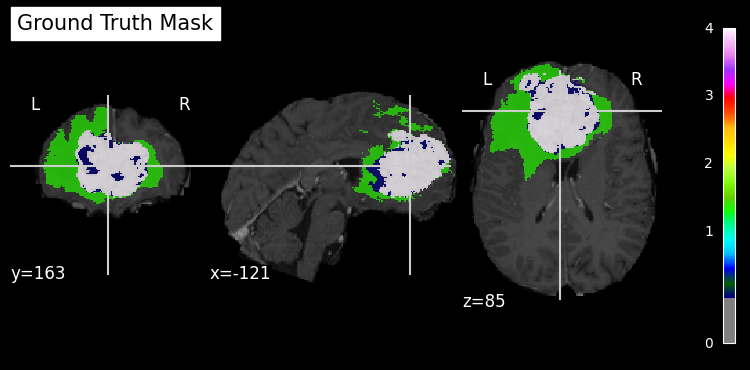

IOU: 0.8846196266578432
Dice: 0.9387778988873364
*************
*************


In [23]:
for i in range(5):
  random_num = random.randint(0, len(pred_masks))
  print(f"image = {img_files[random_num]}")
  visualize_mri(pred_masks[random_num], img_files[random_num],title='Predicted Mask')
  visualize_mri(gnd_truth_masks[random_num], img_files[random_num], title = 'Ground Truth Mask')
  print(f"IOU: {ious[random_num]}")
  print(f"Dice: {dices[random_num]}")
  print("*************")
  print("*************")